<a href="https://colab.research.google.com/github/Liping-LZ/BDAI_2324/blob/main/Regression/Regression_challenge_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on Multiple Linear Regression (MLR) Activity

Download the find more information about the datasets:
* [Air Quality](https://archive.ics.uci.edu/dataset/360/air+quality).
* [Energy Efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency).

In [65]:
# Import the libraries

# Data and array manipulations
import pandas as pd
import numpy as np

# Graphics implementaion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine learning algorithms/techniques
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

First, let us process the AirQuality dataset. It requires us to define the delimiter.

In [66]:
airData = pd.read_csv('AirQualityUCI.csv', delimiter=';', low_memory=False)
airData.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


Looking at the table, we can see that Data transformation is needed.

First, there are different features with fractional numbers represented with a comma (,) instead of a dot (.).

Secondly, we have two features almost fully empty (Unnamed 15 and Unnamed 16).

Now, check the data types to verify the need for further data transformation.

In [67]:
airData.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

We have numeric features with the wrong type: C6H6, R, RH, AH. They should be `float` or `int`. Also, the date and time are also not correct.

In [68]:
# 1. Convert Date from string to datetime format
airData['Date'] = pd.to_datetime(airData['Date'], format='%d/%m/%Y')

# 2. Convert 'Time' column to time format (object dtype)
# First, create a temporary datetime column from 'Time', then extract time part
airData['TempTime'] = pd.to_datetime(airData['Time'], format='%H.%M.%S')
# Convert to time format
airData['Time'] = airData['TempTime'].dt.time
# Drop the temporary datetime column
airData.drop('TempTime', axis=1, inplace=True)

airData.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-03-10,18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,2004-03-10,19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,2004-03-10,20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,2004-03-10,21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,2004-03-10,22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


For the remaining transformations, we need to replace the comma by a dot and the type to numeric.

In [69]:
airData['CO(GT)'] = airData['CO(GT)'].str.replace(',','.').astype(float)
airData['C6H6(GT)'] = airData['C6H6(GT)'].str.replace(',','.').astype(float)
airData['T'] = airData['T'].str.replace(',','.').astype(float)
airData['RH'] = airData['RH'].str.replace(',','.').astype(float)
airData['AH'] = airData['AH'].str.replace(',','.').astype(float)
airData.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


Checking the data types again we can see it is correct.

In [70]:
airData.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Unnamed: 15             float64
Unnamed: 16             float64
dtype: object

Now, we need to remove the columns with almost all values missing. In this case, we cannot remove rows because it will remove almost the entire dataset. Hence, we need to remove the feature. Additionaly, we can remove date and time as they are not important.

In [71]:
# To remove a single colum. axis=1 removes the column, while axis=0 remove the row
#airData.drop('Unnamed: 15', axis=1, inplace=True)#

#removing multiple columns simultaneously
airData.drop(columns=['Date','Time','Unnamed: 15', 'Unnamed: 16'], inplace=True)
airData.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Now we can verify the existance of missing values and remove them

In [72]:
# Check for missing values and remove them (if any)
airData.isnull().sum()

CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [73]:
#Remove missing values
airData.dropna(inplace=True)

Plotting the correlation matrix

<Axes: >

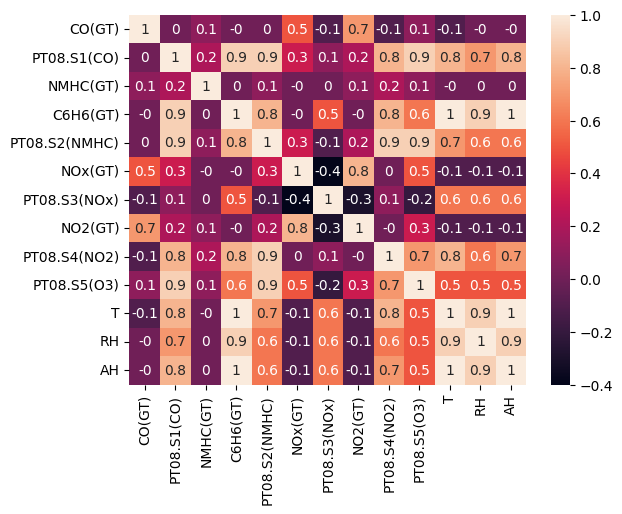

In [74]:
# Exploratory Data Analysis
# create a correlation matrix
correlation_matrix = airData.corr().round(1) #.round(1) is used to limit the decimal places to 1, and make visualisation friendly.
# print a correlation heat map
sns.heatmap(data=correlation_matrix, annot=True)

Let us obtain the name of all features, so we can copy and paste the ones we need (instead of typing their names).

In [75]:
airData.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [76]:
# Split the data into independent variables (X) and the dependent variable (Y)
X = airData[['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH']]
Y = airData['CO(GT)'] # to predict CO concentration.

Now that we have our independent (X) and dependent (Y) variables, we can split the dataset

In [77]:
# Split Data into Training and Testing Sets

# Supervised Learning requires training. Therefore, we split the dataset for training and testing purposes.
# Commonly, a 80/20 split is used, i.e., 80% of the data for training and 20% for testing.
# Replace test_size by the testing percentage you would like (0.2 = 20%).

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Create the Multiple Linear Regression model

In [78]:
# Create a linear regression model
airData_model = LinearRegression()

# Fit the model to the training data
airData_model.fit(X_train, Y_train)

LinearRegression()

Check the coefficients

In [79]:
# Print the coefficients and intercept
print('Intercept:', airData_model.intercept_)
print('Coefficients:', airData_model.coef_)

Intercept: -49.31619013702584
Coefficients: [-0.01327627  0.05312574 -0.46313695 -0.00715824  0.03569708  0.01384572
  0.3795825  -0.00401029 -0.00711034  0.48403942  0.29517249 -0.27329261]


Make the predictions with the test chuck of the dataset

In [80]:
# Make predictions on the test set
Y_pred = airData_model.predict(X_test)

Evaluate the model

In [81]:
# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred, squared=False))
print('R^2:',metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 33.47495370342326
Mean Squared Error: 2863.6089690433732
Root Mean Squared Error: 53.51269913808659
R^2: 0.5153096813141792


Plot the predicted values if necessary.

In [82]:
# Convert Y_test to numpy array of type float if it's not already
Y_test_float = Y_test.astype(float)

# Ensure Y_pred is also in the correct format, flatten the array to match Y_test's shape
Y_pred_float = Y_pred.flatten()

# Create a DataFrame for plotting
airData_plot = pd.DataFrame({
    'Actual CO(GT)': Y_test_float,
    'Predicted CO(GT)': Y_pred_float
})

# Recalculate the best fit line coefficients with clean, numeric data
m, b = np.polyfit(airData_plot['Actual CO(GT)'], airData_plot['Predicted CO(GT)'], 1)

# Create the scatter plot using Plotly Express
fig = px.scatter(airData_plot, x='Actual CO(GT)', y='Predicted CO(GT)', title='Actual vs. Predicted CO(GT) Levels',
                 labels={'Actual CO(GT)': 'Actual CO(GT)', 'Predicted CO(GT)': 'Predicted CO(GT)'},
                 hover_data={'Actual CO(GT)': True, 'Predicted CO(GT)': True})

# Add the best fit line to the plot
fig.add_trace(go.Scatter(x=airData_plot['Actual CO(GT)'], y=m*airData_plot['Actual CO(GT)']+b,
                         mode='lines', name='Best Fit Line', line=dict(color='red')))

# Enhance layout for better readability
fig.update_layout(autosize=False, width=800, height=600, hovermode='closest')

# Show plot
fig.show()

Let us analyse the Energy Efficiency dataset now.

In [83]:
energyData = pd.read_excel('ENB2012_data.xlsx')
energyData.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [84]:
energyData.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object

In [85]:
# Check for missing values and remove them (if any)
energyData.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

<Axes: >

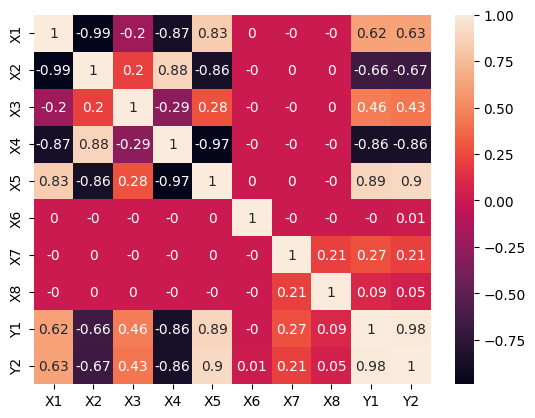

In [86]:
# Exploratory Data Analysis
# create a correlation matrix
correlation_matrix = energyData.corr().round(2)
# print a correlation heat map
sns.heatmap(data=correlation_matrix, annot=True)

In [87]:
energyData.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [88]:
# Split the data into independent variables (X) and the dependent variable (Y)
X2 = energyData[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y2 = energyData['Y1']

In [89]:
# Split Data into Training and Testing Sets

# Supervised Learning requires training. Therefore, we split the dataset for training and testing purposes.
# Commonly, a 80/20 split is used, i.e., 80% of the data for training and 20% for testing.
# Replace test_size by the testing percentage you would like (0.2 = 20%).

# Split the dataset into training and testing sets
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [90]:
# Create a linear regression model
energyData_model = LinearRegression()

# Fit the model to the training data
energyData_model.fit(X2_train, Y2_train)

LinearRegression()

In [91]:
# Print the coefficients and intercept
print('Intercept:', energyData_model.intercept_)
print('Coefficients:', energyData_model.coef_)

Intercept: 79.67234644301377
Coefficients: [-6.18133611e+01  2.36804557e+11 -2.36804557e+11 -4.73609113e+11
  4.12330008e+00 -3.25489957e-02  2.01418016e+01  2.11076907e-01]


In [92]:
# Make predictions on the test set
Y2_pred = energyData_model.predict(X2_test)

In [93]:
# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(Y2_test, Y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y2_test, Y2_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(Y2_test, Y2_pred, squared=False))
print('R^2:',metrics.r2_score(Y2_test, Y2_pred))

Mean Absolute Error: 2.182512239485149
Mean Squared Error: 9.151736165801019
Root Mean Squared Error: 3.025183658193502
R^2: 0.9121987467347555


In [94]:
# Plot the results

# Prepare a DataFrame with actual and predicted values
energyData_results = pd.DataFrame({'Actual Y1': Y2_test, 'Predicted Y1': Y2_pred})

fig = px.scatter(energyData_results, x='Actual Y1', y='Predicted Y1', title='Actual vs. Predicted Y1',
                 labels={'Actual Y1': 'Actual Y1', 'Predicted Y1': 'Predicted Y1'},
                 trendline='ols', trendline_color_override='red')

# Adding a marker for the intercept, simplified to use the model's intercept directly
intercept2 = energyData_model.intercept_
# Plot a point for the intercept - this approach plots it off the actual vs predicted line, for illustrative purposes
fig.add_trace(px.scatter(x=[0], y=[intercept2], labels={'0': 'Intercept'},).data[0])

fig.update_traces(marker=dict(size=10,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Enhancing layout for better readability
fig.update_layout(autosize=False, width=800, height=600, hovermode='closest')

fig.show()

Predicting for Y2

In [95]:
# Split the data into independent variables (X) and the dependent variable (Y)
X3 = energyData[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y3 = energyData['Y2']

# Split Data into Training and Testing Sets

# Supervised Learning requires training. Therefore, we split the dataset for training and testing purposes.
# Commonly, a 80/20 split is used, i.e., 80% of the data for training and 20% for testing.
# Replace test_size by the testing percentage you would like (0.2 = 20%).

# Split the dataset into training and testing sets
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.2, random_state=42)

# Create a linear regression model
energyData_model2 = LinearRegression()

# Fit the model to the training data
energyData_model2.fit(X3_train, Y3_train)

# Print the coefficients and intercept
print('Intercept:', energyData_model2.intercept_)
print('Coefficients:', energyData_model2.coef_)

# Make predictions on the test set
Y3_pred = energyData_model2.predict(X3_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(Y3_test, Y3_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y3_test, Y3_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(Y2_test, Y2_pred, squared=False))
print('R^2:',metrics.r2_score(Y3_test, Y3_pred))

# Plot the results

# Prepare a DataFrame with actual and predicted values
energyData_results2 = pd.DataFrame({'Actual Y2': Y3_test, 'Predicted Y2': Y3_pred})

fig = px.scatter(energyData_results2, x='Actual Y2', y='Predicted Y2', title='Actual vs. Predicted Y2',
                 labels={'Actual Y2': 'Actual Y2', 'Predicted Y2': 'Predicted Y2'},
                 trendline='ols', trendline_color_override='red')

# Adding a marker for the intercept, simplified to use the model's intercept directly
intercept3 = energyData_model2.intercept_
# Plot a point for the intercept - this approach plots it off the actual vs predicted line, for illustrative purposes
fig.add_trace(px.scatter(x=[0], y=[intercept3], labels={'0': 'Intercept'},).data[0])

fig.update_traces(marker=dict(size=10,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Enhancing layout for better readability
fig.update_layout(autosize=False, width=800, height=600, hovermode='closest')

fig.show()

Intercept: 100.61852810835686
Coefficients: [-7.11043434e+01 -7.82149273e+10  7.82149273e+10  1.56429855e+11
  4.04628599e+00  5.52652851e-02  1.47880475e+01  3.37605946e-02]
Mean Absolute Error: 2.195399539011747
Mean Squared Error: 9.896048105943512
Root Mean Squared Error: 3.025183658193502
R^2: 0.8931972456590836
